In [ ]:
# !pip install bayesian-optimization
# !pip install iteration-utilities

In [1]:
# for development:
%load_ext autoreload
%autoreload 2

# standards:
import numpy as np
import pandas as pd

# graphics:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from cmcrameri import cm
import cmocean

import tqdm
# Fix global random state

import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap


import networkx as nx

import dill as pickle      


In [2]:
# !mkdir instep

SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

OSError: 'opinions.mplstyle' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

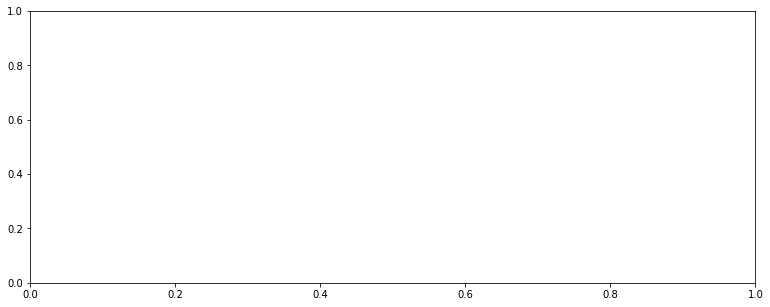

In [3]:
from simple_teams.game_structure import game, game_mixture

prisoners_dilemma = game(
    name="Prisoners Dilemma",
    n_players=2,
    n_choices=2,
    payoffs=[[3, 3], [-3, 4],[4, -3],  [1,1]],
#     payoffs=[[2, 3], [0, -6],[0, 2],  [1,1]],

    size=dict(width=700, height=170),
)

prisoners_dilemma.show_game()
prisoners_dilemma.set_up_TR_strategies(100)
prisoners_dilemma.plot_TR_utils(player=0,figsize=(13, 5))
plt.savefig('instep/pd_utils.png',dpi=300,bbox_inches='tight')


In [ ]:

hilo = game(
    name="HiLo",
    n_players=2,
    n_choices=2,
    payoffs=[[3,3], [0,0], [0,0], [1,1]],
#     payoffs=[[2,1], [0,0], [0,0], [1,2]],

    size=dict(width=700, height=170),
)

hilo.show_game()

hilo.set_up_TR_strategies(100)
hilo.plot_TR_utils(player=1,figsize=(13, 5))
# plt.savefig('instep/hilo_utils.png',dpi=300,bbox_inches='tight')


SankeyWidget(layout=Layout(height='170', width='700'), links=[{'source': '(0) init', 'target': '(1) Player: 1,…

In [ ]:
# hilo.player_data


In [ ]:
        
my_game_mixture = game_mixture([[prisoners_dilemma,.5],
                                [hilo,0.5]])


In [ ]:
# G = nx.random_partition_graph([8 for x in range(4)], 0.6,0.01)
G = nx.complete_graph(32)
# G = nx.powerlaw_cluster_graph(32,1,0.01)

# G =  nx.erdos_renyi_graph(32,p=0.4)
def ensure_graph_connectivity(G):
    for node in list(nx.isolates(G)):
        random_connection = node
        while random_connection == node:
            random_connection = np.random.randint(len(G.nodes()))
        G.add_edge(node,random_connection)
    return G

def plot_graph(G, figsize=(10, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.style.use("opinions.mplstyle")
    positions = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, positions, node_size=120, node_color="#1a2340", alpha=0.8)
    nx.draw_networkx_edges(G, positions, edge_color="grey", width=1, alpha=1)
    plt.axis('off')

G = ensure_graph_connectivity(G)
plot_graph(G)
plt.savefig('instep/complete_graph_img.png',dpi=300,bbox_inches='tight')


In [8]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 

model = model.team_reasoning_model(
    proportion_team_reasoners=0.7,
    n_agents=32,
    init_network=G,
    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
    probability_team_reasoning=1,
    utility_calculation="expected_utility",
    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)
    
)


# expected_utility
for t in tqdm.tqdm_notebook(range(40)):
    model.step()
    
    
# https://www.youtube.com/watch?v=aZa8Wd8Nc8o


0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/40 [00:00<?, ?it/s]

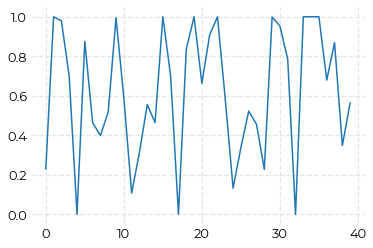

True
False
True
True
True
True
True
True
False
True
True
True
True
False
True
False
True
True
True
True
True
True
True
True
True
True
False
False
True
True
False
True


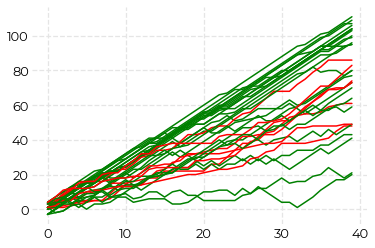

In [9]:
k = 3
plt.plot([x['omega'] for x  in model.schedule._agents[k].my_learner.attempts])
plt.show()

for k in range(0,len(model.schedule._agents)):
    print(model.schedule._agents[k].team_reasoner)
    if model.schedule._agents[k].team_reasoner:
        c = 'green'
    else:
        c ='red'
#     print(model.schedule._agents[k].team_reasoner)
    plt.plot(np.cumsum([x['target'] for x  in model.schedule._agents[k].my_learner.attempts]),c=c)
plt.show()

# model.schedule._agents[k].my_learner.attempts

[38.         36.97435897 35.94871795 34.92307692 33.8974359  32.87179487
 31.84615385 30.82051282 29.79487179 28.76923077 27.74358974 26.71794872
 25.69230769 24.66666667 23.64102564 22.61538462 21.58974359 20.56410256
 19.53846154 18.51282051 17.48717949 16.46153846 15.43589744 14.41025641
 13.38461538 12.35897436 11.33333333 10.30769231  9.28205128  8.25641026
  7.23076923  6.20512821  5.17948718  4.15384615  3.12820513  2.1025641
  1.07692308  0.05128205  0.97435897  2.        ]


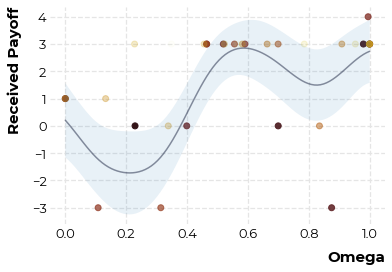

In [10]:
k = 3

step = 38
omega = [x['omega'] for x  in model.schedule._agents[k].my_learner.attempts]
target = [x['target'] for x  in model.schedule._agents[k].my_learner.attempts]
dist_from_point = np.abs(step-np.linspace(0,len(omega),len(omega)))
print(dist_from_point)

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)


plt.scatter(omega,target,c=dist_from_point,cmap=my_tr_cmap)

distribution = model.schedule._agents[k].my_learner.distributions[step]
x = np.linspace(0, 1, 100)
# print(distribution)
plt.fill_between(x, distribution[0] + distribution[1], distribution[0] - distribution[1], alpha=0.1)

plt.plot(x,distribution[0], c="#1a2340", alpha=0.5)

plt.xlabel("Omega", labelpad=10)
plt.ylabel("Received Payoff", labelpad=10)
plt.show()

Text(0.5, 0, 'Probability-density')

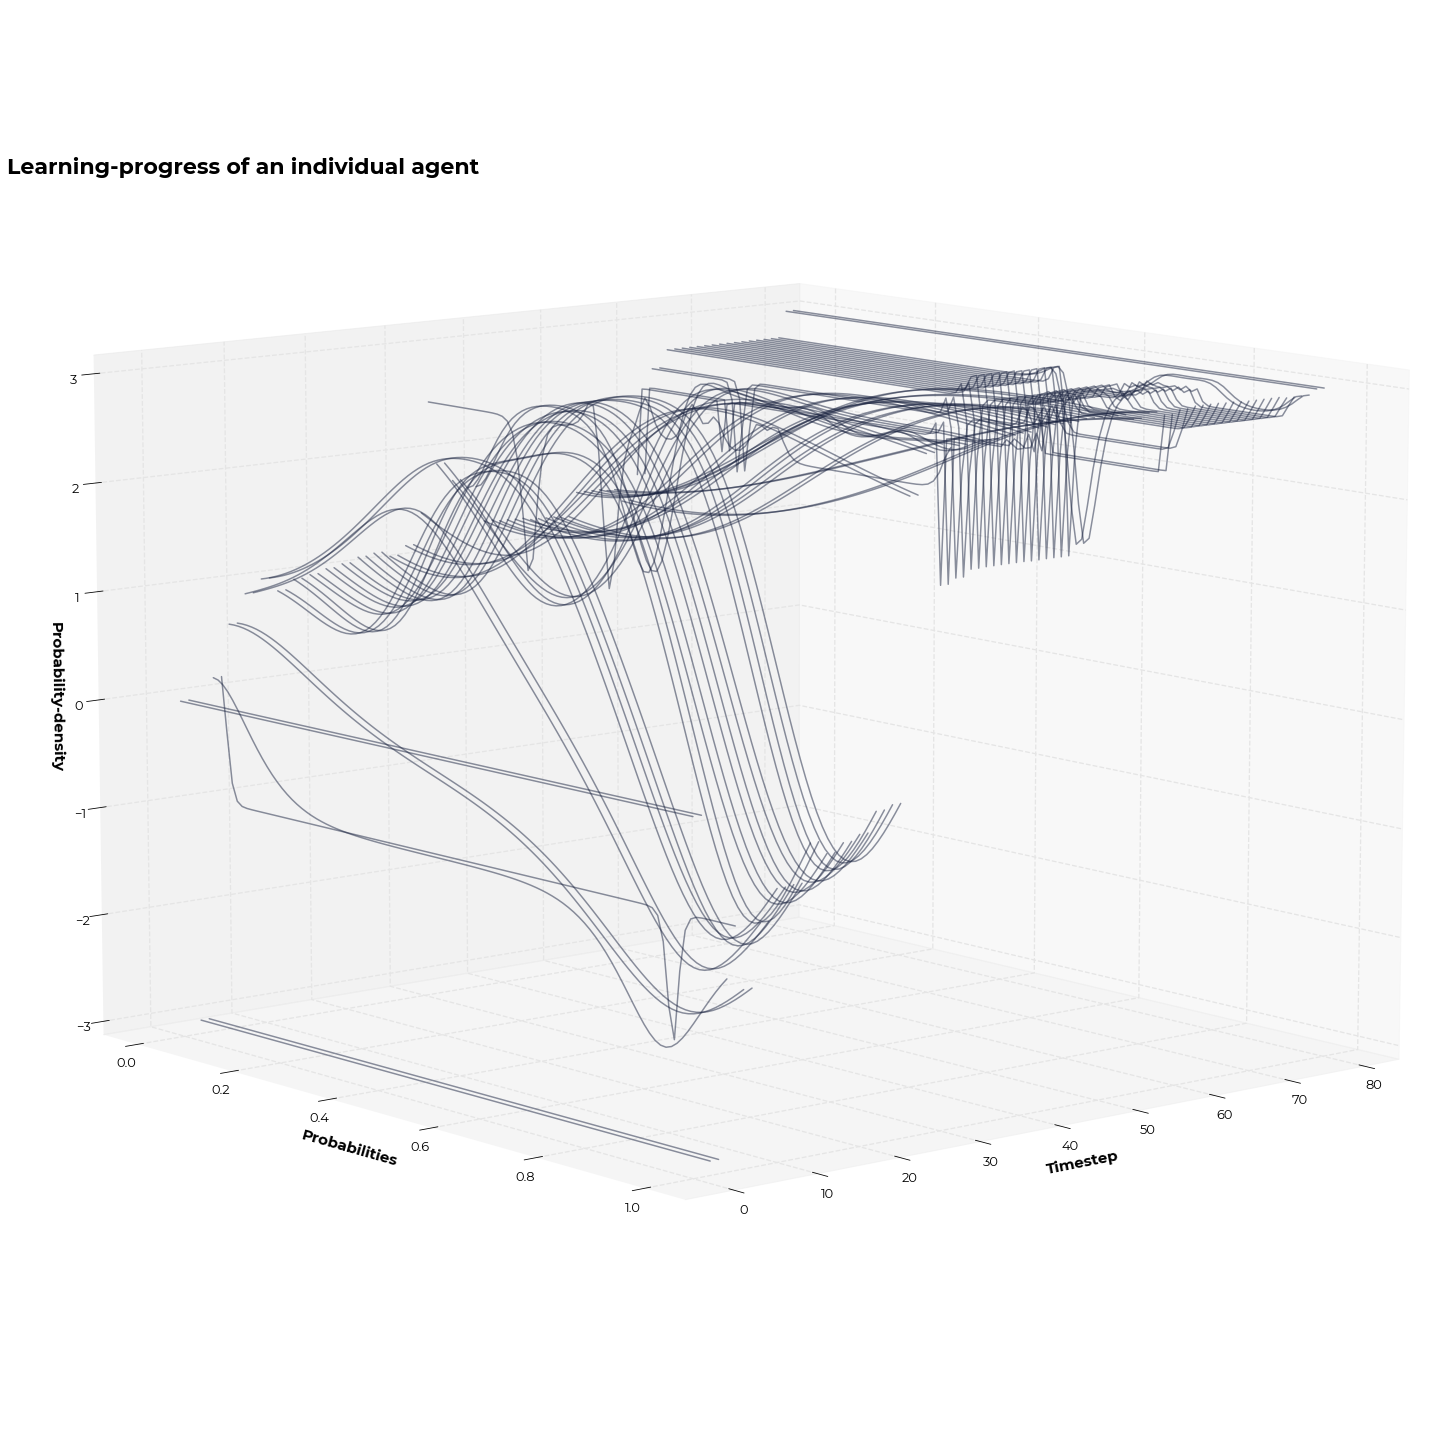

In [11]:

fig = plt.figure(figsize=(20, 20))
ax = axes3d.Axes3D(fig)
ax.view_init(10, 50)

import cmocean

for ix, distribution in enumerate(
    model.schedule._agents[9].my_learner.distributions
):
    x = np.linspace(0, 1, 100)
    plt.plot([ix] * len(x), x, zs=distribution[0], c="#1a2340", alpha=0.5)
#     expected_value = distribution.expect()
#     ax.scatter(
#         np.array(ix),
#         np.array(expected_value),
#         np.array(distribution.pdf(expected_value)),
#         s=10,
#         c="black", alpha=0.6,
#     )
plt.title("Learning-progress of an individual agent", y=0.87)
ax.invert_xaxis()

plt.xlabel("Timestep", labelpad=10)
plt.ylabel("Probabilities", labelpad=10)
ax.set_zlabel("Probability-density")

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/32 [00:00<?, ?it/s]

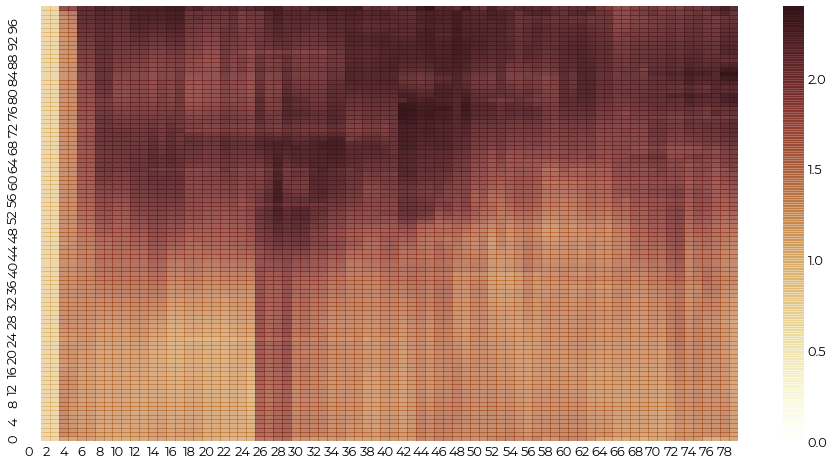

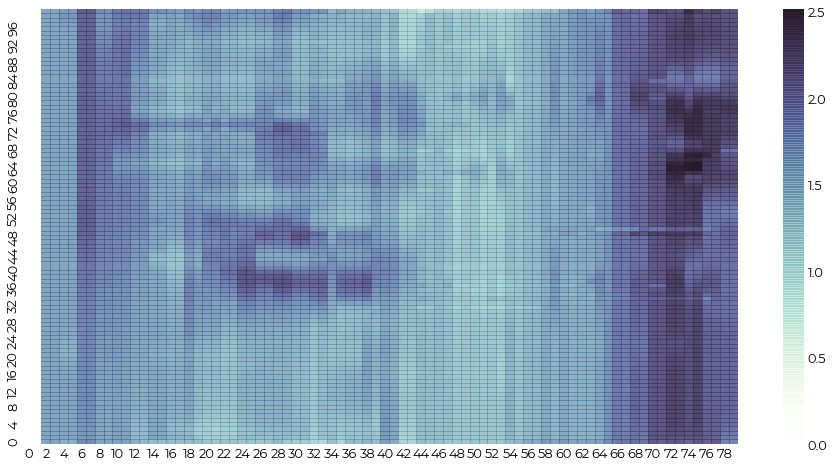

In [12]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)

cmap = cmocean.cm.deep  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_non_tr_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(16, 8))

agents = [model.schedule._agents[x] for x in model.schedule._agents.keys()]
# agents = agents[0:2]
mappings = []
for agent in tqdm.tqdm_notebook(agents):
    collected_values = []
    for ix, distribution in enumerate(agent.my_learner.distributions):

        n = 100
        x = np.linspace(0, 1, n)
        alphas = distribution[0]#distribution.pdf(x)
        #         alphas = (alphas - np.min(alphas)) / (np.max(alphas) - np.min(alphas))
        collected_values.append(alphas)
    mappings.append(np.hstack([x.reshape(-1, 1) for x in collected_values]))


sns.heatmap(
np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
),
    cmap=my_tr_cmap,
    cbar=True,
)
ax.invert_yaxis()
plt.show()

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(
np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([not agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
),
    
    cmap=my_non_tr_cmap,
    cbar=True,
)
ax.invert_yaxis()
plt.show()




In [40]:
list(range(0,1))

[0]

# multirun


In [70]:
# random_partition

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        n=0
        while n<3: #dirty hack to avoid untracked error
#         for ix in range(0,3):
    #         G = nx.powerlaw_cluster_graph(32,1,0.01)
            try:
                G = nx.random_partition_graph([8 for x in range(4)], 0.6,0.01)

                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                pass
            
            
pickle.dump(model_list, open('instep/random_partition_simulations_pickle.pkl', 'wb')) 

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/21 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
# fully_connected

from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        
        n=0
        while n<3: #dirty hack to avoid untracked error
#         for ix in range(0,3):
    #         G = nx.powerlaw_cluster_graph(32,1,0.01)
            try:
                G = nx.complete_graph(32)

                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                pass

            
pickle.dump(model_list, open('instep/complete_graph_simulations_pickle.pkl', 'wb')) 

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/21 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:43: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

In [8]:
from simple_teams import model 
from simple_teams.learners import bayesian_gaussian_process 


model_list = []



pd_share = [0.5]#np.linspace(0,1,9)#9
tr_proportions = np.linspace(0,1,21)#11

for this_pd_share in tqdm.tqdm_notebook(pd_share):
    my_game_mixture = game_mixture([[prisoners_dilemma,this_pd_share],
                                [hilo,1-this_pd_share]])
    
    for tr_proportion in tqdm.tqdm_notebook(tr_proportions):
        n=0
        while n<3: #dirty hack to avoid untracked error

            try:
                G = nx.powerlaw_cluster_graph(32,1,0.01)
                G = ensure_graph_connectivity(G)


                this_model = model.team_reasoning_model(
                    proportion_team_reasoners=tr_proportion,
                    n_agents=32,
                    init_network=G,
                    games=my_game_mixture,#prisoners_dilemma,#my_game_mixture,
                    probability_team_reasoning=1,
                    utility_calculation="expected_utility",
                    learner = bayesian_gaussian_process(window=12, kappa=4, xi=0.0, alpha=.7)

                )


                # expected_utility
                for t in tqdm.tqdm_notebook(range(30)):
                    this_model.step()
                model_list.append(this_model)
                n+=1
            except:
                print('some error')
                pass
            
pickle.dump(model_list, open('instep/powerlaw_cluster_simulations_pickle_2.pkl', 'wb')) 

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/21 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

0


C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/30 [00:00<?, ?it/s]

In [21]:
len(model_list_2)

33

In [15]:

model_list_2 = pickle.load(open(r"instep/random_partition_simulations_pickle.pkl","rb"))


In [16]:
collected_payoffs = []
for ix,this_model in enumerate(model_list_2):
    current_tr_proportion =this_model.proportion_team_reasoners
    for agent in [this_model.schedule._agents[k] for k in this_model.schedule._agents.keys()]:
#         print(agent.team_reasoner)
        collected_payoffs.append((current_tr_proportion,
                                  np.sum([x['target'] for x  in agent.my_learner.attempts]),
                                 np.int(agent.team_reasoner)))
        
        
collected_payoffs = np.array(collected_payoffs)

In [17]:
from pygam import LinearGAM
from pygam import ExpectileGAM

X,y = collected_payoffs[:,0].reshape(-1,1), collected_payoffs[:,1].reshape(-1,1)

gam = LinearGAM().gridsearch(X, y)
# gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [18]:
w_tr = collected_payoffs[:,2].astype(bool)#np.where(collected_payoffs[:,2]==1)

X_tr, y_tr = collected_payoffs[w_tr,0].reshape(-1,1),collected_payoffs[w_tr,1].reshape(-1,1)

gam_tr = LinearGAM().gridsearch(X_tr, y_tr)
# gam_tr.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [19]:
w_nontr = ~collected_payoffs[:,2].astype(bool)#np.where(collected_payoffs[:,2]==1)
# print(w_nontr)
X_nontr, y_nontr = collected_payoffs[w_nontr,0].reshape(-1,1),collected_payoffs[w_nontr,1].reshape(-1,1)

gam_nontr = LinearGAM().gridsearch(X_nontr, y_nontr)
# gam_nontr.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0, 1, 'Aggregated Payoffs')

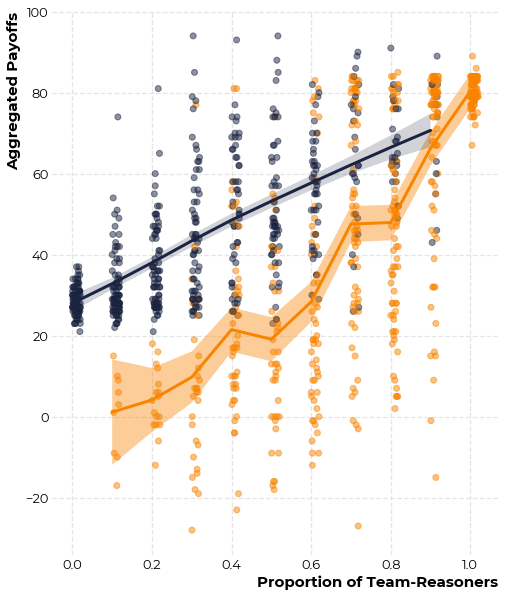

In [20]:


fig, ax = plt.subplots(figsize=(8, 10))
newcmap = cmocean.tools.crop_by_percent(cmocean.cm.haline, 30, which='both', N=None)

plt.scatter(x=collected_payoffs[:,0]+np.random.rand(collected_payoffs.shape[0])*0.02,
            y= collected_payoffs[:,1],
            c=[['#1a2340','#f98400'][int(x)] for x in collected_payoffs[:,2]],
           alpha=0.5
           )

# plt.scatter(x=collected_payoffs[w_tr,0]+np.random.rand(collected_payoffs[w_tr,0].shape[0])*0.02,
#             y= collected_payoffs[w_tr,1],
#            )

# plt.plot(np.unique(X), gam.predict(np.unique(X)), color='black', linewidth=3)
# conf = gam.confidence_intervals(np.unique(X), width=0.95, quantiles=None)
# ax.fill_between(np.unique(X),conf[:,0],conf[:,1], 
#                  facecolor='black', alpha=0.2,interpolate=True)




plt.plot(np.unique(X_tr), gam_tr.predict(np.unique(X_tr)), color='#f98400', linewidth=3)
conf = gam_tr.confidence_intervals(np.unique(X_tr), width=0.95, quantiles=None)
ax.fill_between(np.unique(X_tr),conf[:,0],conf[:,1], 
                 facecolor='#f98400', alpha=0.4,interpolate=True)



plt.plot(np.unique(X_nontr), gam_nontr.predict(np.unique(X_nontr)), color='#1a2340', linewidth=3)
conf = gam_nontr.confidence_intervals(np.unique(X_nontr), width=0.95, quantiles=None)
ax.fill_between(np.unique(X_nontr),conf[:,0],conf[:,1], 
                 facecolor='#1a2340', alpha=0.2,interpolate=True)


plt.xlabel("Proportion of Team-Reasoners")
plt.ylabel("Aggregated Payoffs")
# plt.show()

# plt.savefig('instep/community_payoffs.png',dpi=300,bbox_inches='tight')


In [101]:
tr_proportions = np.linspace(0,1,11)


In [231]:
# model_df = model.datacollector.get_model_vars_dataframe()
# agent_df = model.datacollector.get_agent_vars_dataframe()

# agent_df = agent_df.reset_index()

In [232]:
# [.my_learner.my_distributions[].expect() for y in model.schedule._agents[20]]

In [19]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# fig, ax =plt.subplots(figsize=(20,20))

# step_to_plot = 2
# plt.title(
#     "Probability of team-reasoning after "
#     + str(step_to_plot)
#     + " iterations"
# )
# final_agent_df = agent_df[agent_df["Step"] == step_to_plot]



# G = graph_list[step_to_plot]
# # positions = nx.kamada_kawai_layout(G)
# # position_array = np.array([positions[x] for x in positions])
# position_array = coords_list[step_to_plot]

# trs = final_agent_df["team_reasoner"]
# nx.draw_networkx_edges(G, position_array, edge_color="grey", alpha=0.5)



# tr_scatter= plt.scatter(position_array[trs,0],
#             position_array[trs,1], s= 100,#final_agent_df['gathered_utility'][trs] *.3,
#             c=final_agent_df['probability_team_reasoning'][trs],
#             cmap=cmocean.cm.thermal,
#             vmin=0, vmax=1,alpha=1.
            
#            )

# non_tr_scatter = plt.scatter(position_array[~trs,0],
#             position_array[~trs,1],  s= 110
#             , marker = '*',
#            c=final_agent_df['probability_team_reasoning'][~trs],cmap=cmocean.cm.thermal,
#             vmin=0, vmax=1
           
#            )

# # divider = make_axes_locatable(ax)
# # cax = divider.append_axes("right", size="5%", pad=0.05)
   
# cbar = plt.colorbar(tr_scatter,fraction=0.02, pad=0.0)
# cbar.set_label('Probability of team-reasoning',fontsize=10)
# cbar.ax.tick_params(labelsize=10)
# ax.tick_params(labelsize=10)



# plt.legend((tr_scatter,non_tr_scatter),
#            ('Team-Reasoners','Non-Team-Reasoners'),
#            scatterpoints=3,
#            loc='upper right',
#            ncol=1,
#            fontsize=8)
# ax = plt.gca()
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('#fb9e40')
# leg.legendHandles[1].set_color('#092f59')


# plt.axis('equal')
# plt.savefig('network_towards_the_beginning')#,dpi=600)

NameError: name 'agent_df' is not defined

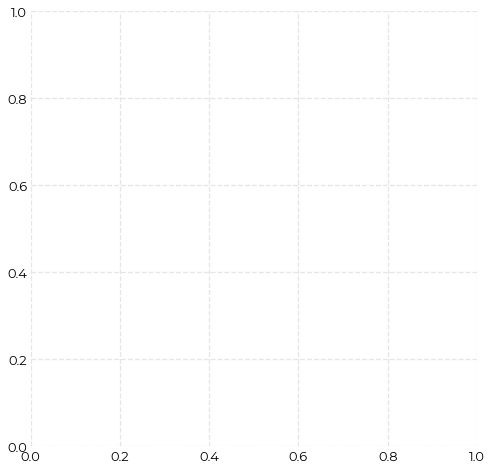

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))
# plt.style.use("opinions.mplstyle")

to_plot = agent_df[agent_df["Step"] == np.max(agent_df["Step"])]

# Plot the orbital period with horizontal boxes
sns.boxplot(
    x="team_reasoner",
    y="gathered_utility",
    data=to_plot,
    whis=[0, 100],
    width=0.6,
    palette=["#1a2340", "#f2ad00"],
)

# Add in points to show each observation
sns.stripplot(
    x="team_reasoner",
    y="gathered_utility",
    data=to_plot,
    size=4,
    color="black",
    linewidth=0,
    alpha=0.5,
)

plt.xlabel("Team-reasoner")
plt.ylabel("Utility")
plt.title(
    "Achieved utility in PD after " + str(np.max(agent_df["Step"])) + " iterations"
)

C:\Users\noich\anaconda3\lib\site-packages\ipykernel_launcher.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/32 [00:00<?, ?it/s]

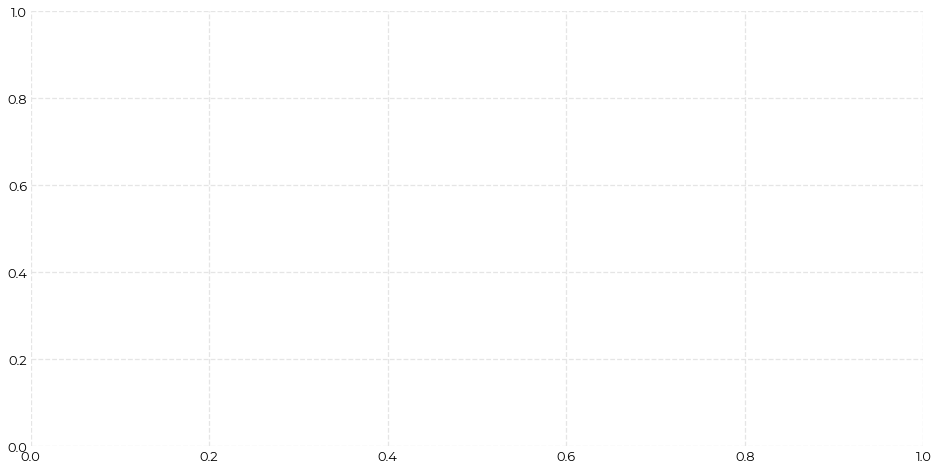

In [68]:
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = cmocean.cm.solar_r  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_tr_cmap = ListedColormap(my_cmap)

cmap = cmocean.cm.deep  # pl.cm.RdBu
my_cmap = cmap(np.arange(cmap.N))
alphas = np.linspace(0, 1, cmap.N)
my_cmap[:, -1] = alphas
my_non_tr_cmap = ListedColormap(my_cmap)

fig, ax = plt.subplots(figsize=(16, 8))

agents = [model.schedule._agents[x] for x in model.schedule._agents.keys()]
# agents = agents[0:2]
mappings = []
for agent in tqdm.tqdm_notebook(agents):
    collected_values = []
    for ix, distribution in enumerate(agent.my_learner.distributions):

        n = 500
        x = np.linspace(0, 1, n)
        alphas = distribution[0]
        #         alphas = (alphas - np.min(alphas)) / (np.max(alphas) - np.min(alphas))
        collected_values.append(alphas)
    mappings.append(np.hstack([x.reshape(-1, 1) for x in collected_values]))

<AxesSubplot:>

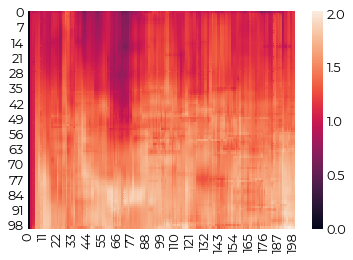

In [69]:
tr_stack = np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
)

non_tr_stack =np.mean(
    np.stack(
        [
            mappings[x]
            for x in np.where([not agent.team_reasoner for agent in agents])[0]
        ], axis=2
    ),
    axis=2,
)


sns.heatmap(tr_stack)

In [70]:
dom = (non_tr_stack-tr_stack)/np.max(non_tr_stack-tr_stack)

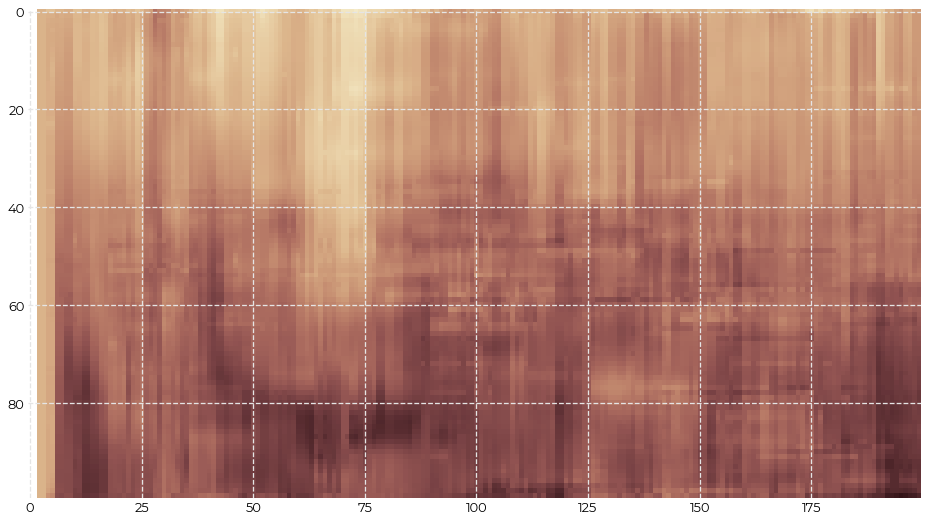

In [72]:
fig, ax = plt.subplots(figsize=(16,9))
# plt.imshow(tr_stack,cmap=my_tr_cmap,origin='upper', aspect='auto')
# facecolor='#FF0000'
plt.imshow(tr_stack,cmap=my_tr_cmap,origin='upper', aspect='auto')
# plt.imshow(non_tr_stack,cmap=my_non_tr_cmap,origin='upper', alpha= dom, aspect='auto')
plt.savefig('stream_plot_2_tr_70')#,dpi=600)

# remem

In [71]:
a.T-a

array([[ 0.        ,  0.00200401,  0.00400802, ...,  0.99599198,
         0.99799599,  1.        ],
       [-0.00200401,  0.        ,  0.00200401, ...,  0.99398798,
         0.99599198,  0.99799599],
       [-0.00400802, -0.00200401,  0.        , ...,  0.99198397,
         0.99398798,  0.99599198],
       ...,
       [-0.99599198, -0.99398798, -0.99198397, ...,  0.        ,
         0.00200401,  0.00400802],
       [-0.99799599, -0.99599198, -0.99398798, ..., -0.00200401,
         0.        ,  0.00200401],
       [-1.        , -0.99799599, -0.99599198, ..., -0.00400802,
        -0.00200401,  0.        ]])

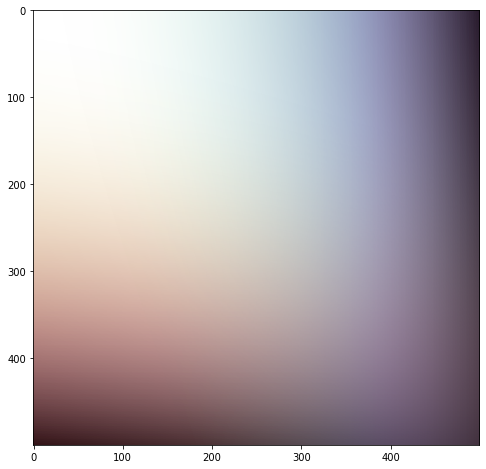

In [86]:
fig, ax = plt.subplots(figsize=(8,8))
a = np.repeat(np.linspace(0,1,500),500).reshape(500,500)
# a_ = a.T+a
# ap = a_#(a_)/np.max(a_)

plt.imshow(a,cmap=my_tr_cmap,origin='upper', aspect='auto',alpha=a-a.T/3)
plt.imshow(a.T,cmap=my_non_tr_cmap,origin='upper', aspect='auto',alpha=a.T-a/3)

plt.savefig('stream_plotlegend')

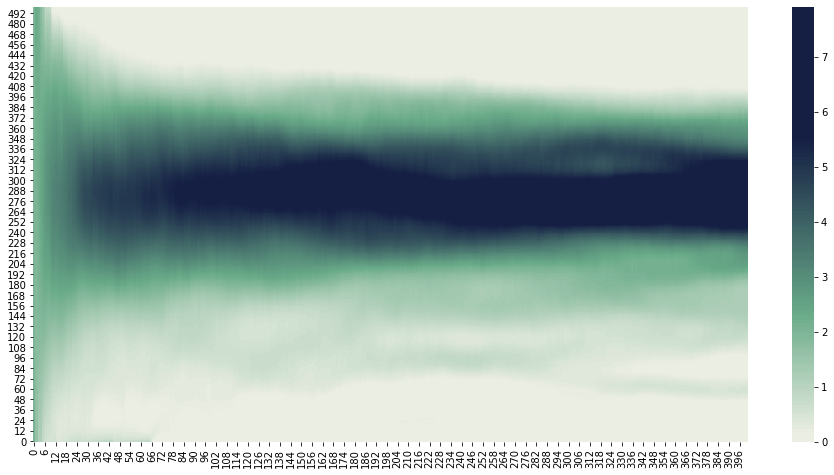

In [65]:
from simple_teams.generate_colormap import get_continuous_cmap


hex_list = ['#4b1148','#4b1148','#d98773', '#ecefe4','#ecefe4','#68aa88','#151f44','#151f44', ]
float_list=[0,.15,.35,.5,.51, .65,.85, 1]
    
    
    
fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(tr_stack+non_tr_stack
            ,cmap=get_continuous_cmap(hex_list, float_list=float_list),
                cbar=True,center=0
)
ax.invert_yaxis()
plt.show()

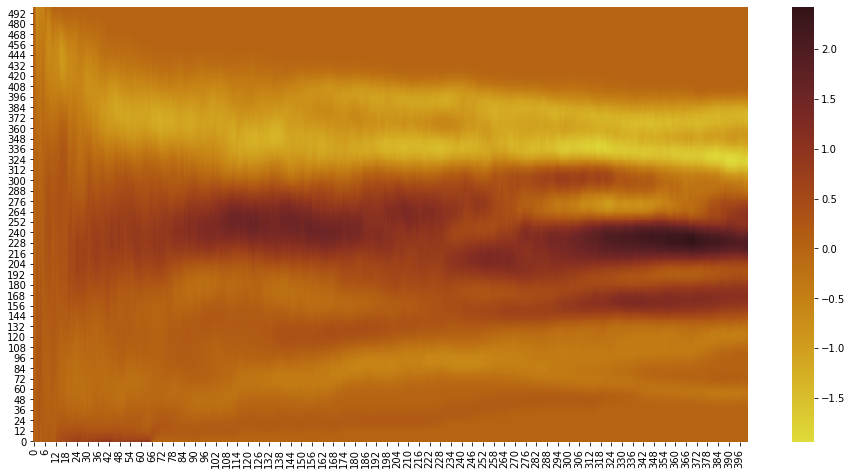

In [63]:
# sns.heatmap(np.max(np.stack([tr_stack,non_tr_stack],axis=2),axis=2))

fig, ax = plt.subplots(figsize=(16, 8))

sns.heatmap(tr_stack-non_tr_stack
            ,cmap=cmocean.cm.solar_r,
                cbar=True,center=0
)
ax.invert_yaxis()
plt.show()


In [8]:
# [x[0] for x in graph_listsb]

In [9]:
from mesa.batchrunner import BatchRunner,BatchRunnerMP
from simple_teams.model import team_reasoning_model
from simple_teams.learners import bayesian_beta_learner


fixed_params = {
    "n_agents": 200,
    "game": prisoners_dilemma,
    "probability_team_reasoning": 1.0,  # we need to take this out
    "utility_calculation": "expected_utility",
    # "learner": bayesian_beta_learner(prior={'type':'flat'})
}

#bayesian_beta_learner(prior={'type':'flat'})
var_params = {
        "tr_threshold": np.linspace(0.05,0.95,5),
        "proportion_team_reasoners":np.linspace(0.05,0.95,5),
        "init_network": [x[0] for x in graph_lists][0],

}


# batchrunner.BatchRunner(model_cls, variable_parameters=None, fixed_parameters=None,
# iterations=1, max_steps=1000, model_reporters=None, agent_reporters=None, display_progress=True)
batch_run = BatchRunner(
team_reasoning_model,
variable_parameters=var_params,
fixed_parameters=fixed_params,
iterations=3,
max_steps=100,
display_progress=True, 
   agent_reporters = {"my_learner":"my_learner"},

# model_reporters = {
#             "proportion_team_reasoners": lambda a: getattr(
#                 a, "proportion_team_reasoners", None
#             ),
#         }
)

batch_run.run_all()


30it [13:43, 23.55s/it]

In [16]:
# run_data = batch_run.get_model_vars_dataframe()
run_data = batch_run.get_agent_vars_dataframe()
run_data

,tr_threshold,proportion_team_reasoners,Run,AgentId,my_learner,n_agents,init_network,game,probability_team_reasoning,utility_calculation
0,0.05,0.05,0,0,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
127,0.05,0.05,0,127,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
128,0.05,0.05,0,128,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
129,0.05,0.05,0,129,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
130,0.05,0.05,0,130,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
...,...,...,...,...,...,...,...,...,...,...
14869,0.95,0.95,74,69,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
14870,0.95,0.95,74,70,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
14871,0.95,0.95,74,71,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility
14861,0.95,0.95,74,61,<simple_teams.learners.bayesian_beta_learner o...,200,"[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",<simple_teams.games.game object at 0x000002ABB...,1.0,expected_utility


In [17]:
# for this_run in np.unique(run_data['Run']):
#     this_run_data = run_data[run_data['Run']==this_run]
#     span = np.linspace(0, 1, 100)
#     learned_distributions = []
#     for this_learner in this_run_data['my_learner']:
#         this_dist = this_learner.my_distributions[-1].pdf(span)
#         # plt.plot(span,this_dist,alpha=0.03,c='#1a2340')
#         learned_distributions.append(this_dist)
    
#     plt.plot(span,np.mean(np.vstack(learned_distributions),axis=0),
#              alpha=.9,c='#B12806')

#     plt.show()

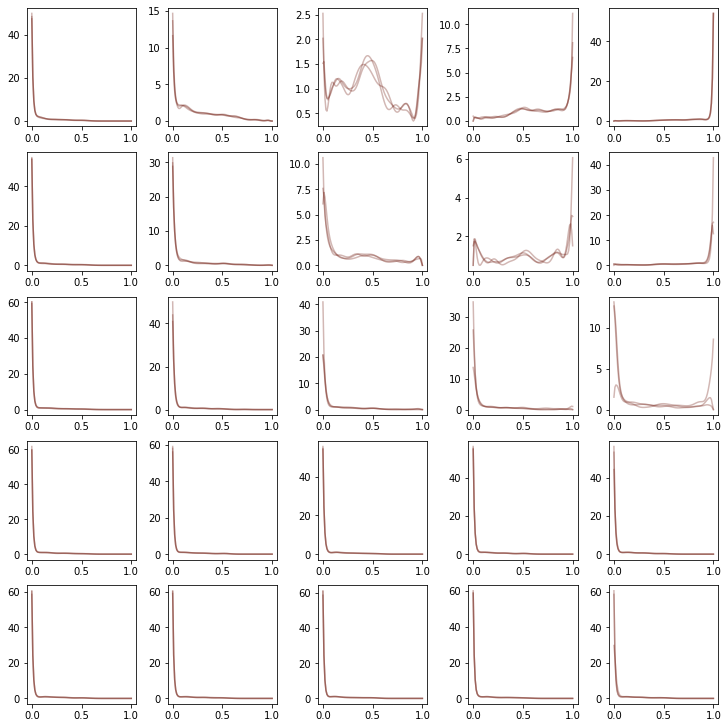

In [18]:
def plot_parameter_grid_learners(data,row,column,figsize=(10,10)):
    row_values = np.unique(data[row])
    column_values = np.unique(data[column])
    
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    gs = fig.add_gridspec(nrows=len(row_values), ncols=len(column_values))

    counter = 0
    span = np.linspace(0, 1, 100)

    for ix,x in enumerate(row_values):
        for iy,y in enumerate(column_values):
            this_data = data[(data[row]==x) & (data[column]==y)]
            this_axis = fig.add_subplot(gs[ix,iy])
            
            for this_run in np.unique(this_data['Run']):
                this_run_data = this_data[this_data['Run']==this_run]
                learned_distributions = []
                for this_learner in this_run_data['my_learner']:
                    this_dist = this_learner.my_distributions[-1].pdf(span)
                    # plt.plot(span,this_dist,alpha=0.03,c='#861111')
                    learned_distributions.append(this_dist)
                
                
                # print(row +' = ' + str(x) +'; '+ column +' = ' + str(y))
                this_axis = plt.plot(span,np.mean(np.vstack(learned_distributions),axis=0),
                alpha=.3,c='#6B1307')
                # this_axis.suptitle(row +' = ' + str(x) +'; '+ column +' = ' + str(y))
             
            
            counter+=1
            
plot_parameter_grid_learners(run_data,'tr_threshold','proportion_team_reasoners',figsize=(10,10))

In [ ]:
plot_parameter_grid_learners(run_data,'tr_threshold',
                             'proportion_team_reasoners',figsize=(10,10))

Johannes Notes:

    * Discuss TR assymetry: Why can't nontrs learn?
    * Brauchen wir überhaupt Dirichlet, wenn das Lernen nur TR vs non-TR ist?
    
Leyla notes:
    * Eigene probability einbeziehen?
    * Erkläre mir: Wie entscheiden wir aufgrund payoffs? 